In [1]:
from __future__ import absolute_import
from __future__ import division

import os
import numpy
import itertools
from sklearn.utils import shuffle

import pandas as pd

# Execute rpy2_setup.sh to install dependencies
import rpy2.robjects as robjects
from rpy2.robjects import pandas2ri
from rpy2.robjects import numpy2ri

import tensorflow as tf

pandas2ri.activate()
numpy2ri.activate()

import matplotlib.pyplot as plt
import numpy as np

# Load RData as Pandas DataFrame

In [2]:
fault_free_training_rf = robjects.r['load']("data/TEP_FaultFree_Training.RData")
fault_free_testing_rf = robjects.r['load']("data/TEP_FaultFree_Testing.RData")

faulty_testing_rf = robjects.r['load']("data/TEP_Faulty_Testing.RData")
faulty_training_rf = robjects.r['load']("data/TEP_Faulty_Training.RData")

# fault_free_training_df = shuffle(pandas2ri.ri2py_dataframe(robjects.globalenv["fault_free_training"]))
# fault_free_testing_df = shuffle(pandas2ri.ri2py_dataframe(robjects.globalenv["fault_free_testing"]))

fault_free_training_df = pd.DataFrame(shuffle(robjects.globalenv["fault_free_training"]))
fault_free_testing_df = pd.DataFrame(shuffle(robjects.globalenv["fault_free_testing"]))

faulty_testing_df = pd.DataFrame(shuffle(robjects.globalenv["faulty_testing"]))
faulty_training_df = pd.DataFrame(shuffle(robjects.globalenv["faulty_training"]))

# print(type(robjects.globalenv["fault_free_training"]))

# Cleanup RData variables
del fault_free_training_rf
del fault_free_testing_rf

In [4]:
fault_free_testing_df

,faultNumber,simulationRun,sample,xmeas_1,xmeas_2,xmeas_3,xmeas_4,xmeas_5,xmeas_6,xmeas_7,...,xmv_2,xmv_3,xmv_4,xmv_5,xmv_6,xmv_7,xmv_8,xmv_9,xmv_10,xmv_11
0,0,223.0,832,0.25486,3708.2,4459.3,9.2653,26.679,42.327,2685.5,...,53.355,25.158,60.679,20.743,42.163,41.216,48.264,45.152,40.846,18.977
1,0,272.0,632,0.25675,3702.0,4451.6,9.3296,26.912,42.205,2696.1,...,53.533,25.687,61.906,21.804,38.491,33.740,47.539,50.601,41.417,17.498
2,0,1.0,576,0.25316,3718.4,4523.2,9.4187,26.744,42.533,2690.8,...,53.793,25.089,61.629,21.380,39.534,39.250,48.824,46.465,40.685,16.218
3,0,449.0,6,0.26174,3676.7,4513.2,9.3758,26.751,42.226,2703.6,...,53.752,25.874,58.756,21.815,39.343,32.176,43.158,47.411,41.400,15.929
4,0,480.0,594,0.24792,3701.3,4529.4,9.3133,27.048,42.358,2709.4,...,54.513,24.398,60.118,22.393,41.300,42.732,48.144,48.273,41.098,16.985
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
479995,0,391.0,395,0.21787,3672.7,4487.0,9.3571,26.689,42.083,2703.6,...,54.184,21.580,59.612,21.877,39.396,39.445,47.645,42.893,41.510,20.693
479996,0,134.0,782,0.26077,3651.1,4491.8,9.2824,27.200,42.239,2709.3,...,54.252,25.213,62.661,22.213,41.192,38.531,46.375,45.913,41.442,21.004
479997,0,48.0,560,0.24099,3696.9,4538.8,9.3677,26.773,42.545,2701.9,...,54.381,23.531,59.479,22.081,38.180,41.765,47.820,48.529,42.430,20.055
479998,0,144.0,743,0.26331,3701.9,4482.1,9.3620,26.803,42.429,2692.4,...,53.258,25.707,61.687,21.423,41.816,37.868,48.859,46.428,40.795,16.467


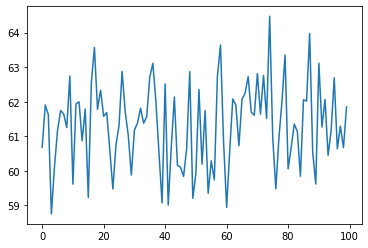

In [5]:
plt.plot(fault_free_testing_df['xmv_4'].iloc[:100])

In [8]:
ts = []
for i in range(0, len(fault_free_training_df)-2048, 256):
    ts.append(fault_free_training_df['xmeas_1'][i:i+2048].values)

In [9]:
ts = np.vstack(ts)
ts.shape

(969, 2048)

In [11]:
np.save('fault_free_training_L2048.npy', ts)

In [14]:
ts = []
for i in range(0, len(fault_free_testing_df)-2048, 256):
    ts.append(fault_free_testing_df['xmeas_1'][i:i+2048].values)

In [15]:
ts = np.vstack(ts)
ts.shape

(1867, 2048)

In [16]:
np.save('fault_free_testing_L2048.npy', ts)

In [17]:
ts = []
for i in range(0, len(faulty_testing_df)-2048, 256):
    ts.append(faulty_testing_df['xmeas_1'][i:i+2048].values)

In [18]:
ts = np.vstack(ts)
ts.shape

(37492, 2048)

In [19]:
np.save('faulty_testing_L2048.npy', ts)

In [25]:
ts = []
for i in range(0, len(faulty_testing_df)-4096, 256):
    ts.append(faulty_testing_df['xmeas_1'][i:i+4096].values)

In [26]:
ts = np.vstack(ts)
ts.shape

(37484, 4096)

In [27]:
np.save('faulty_testing_L4096.npy', ts)

In [3]:
ts = []
for i in range(0, len(faulty_testing_df)-16384, 256):
    ts.append(faulty_testing_df['xmeas_1'][i:i+16384].values)

In [4]:
ts = np.vstack(ts)
ts.shape

(37436, 16384)

In [5]:
np.save('faulty_testing_L16384.npy', ts)

In [20]:
ts = []
for i in range(0, len(faulty_training_df)-2048, 256):
    ts.append(faulty_training_df['xmeas_1'][i:i+2048].values)

In [21]:
ts = np.vstack(ts)
ts.shape

(19524, 2048)

In [22]:
np.save('generated_datasets/faulty_training_L2048.npy', ts)